By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/12

Videos:
* [[10分鐘搞懂機器學習] 8.5 最廣泛使用的集成學習演算法之一 隨機森林 Random forests](https://youtu.be/f1gwqkgnIAA)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


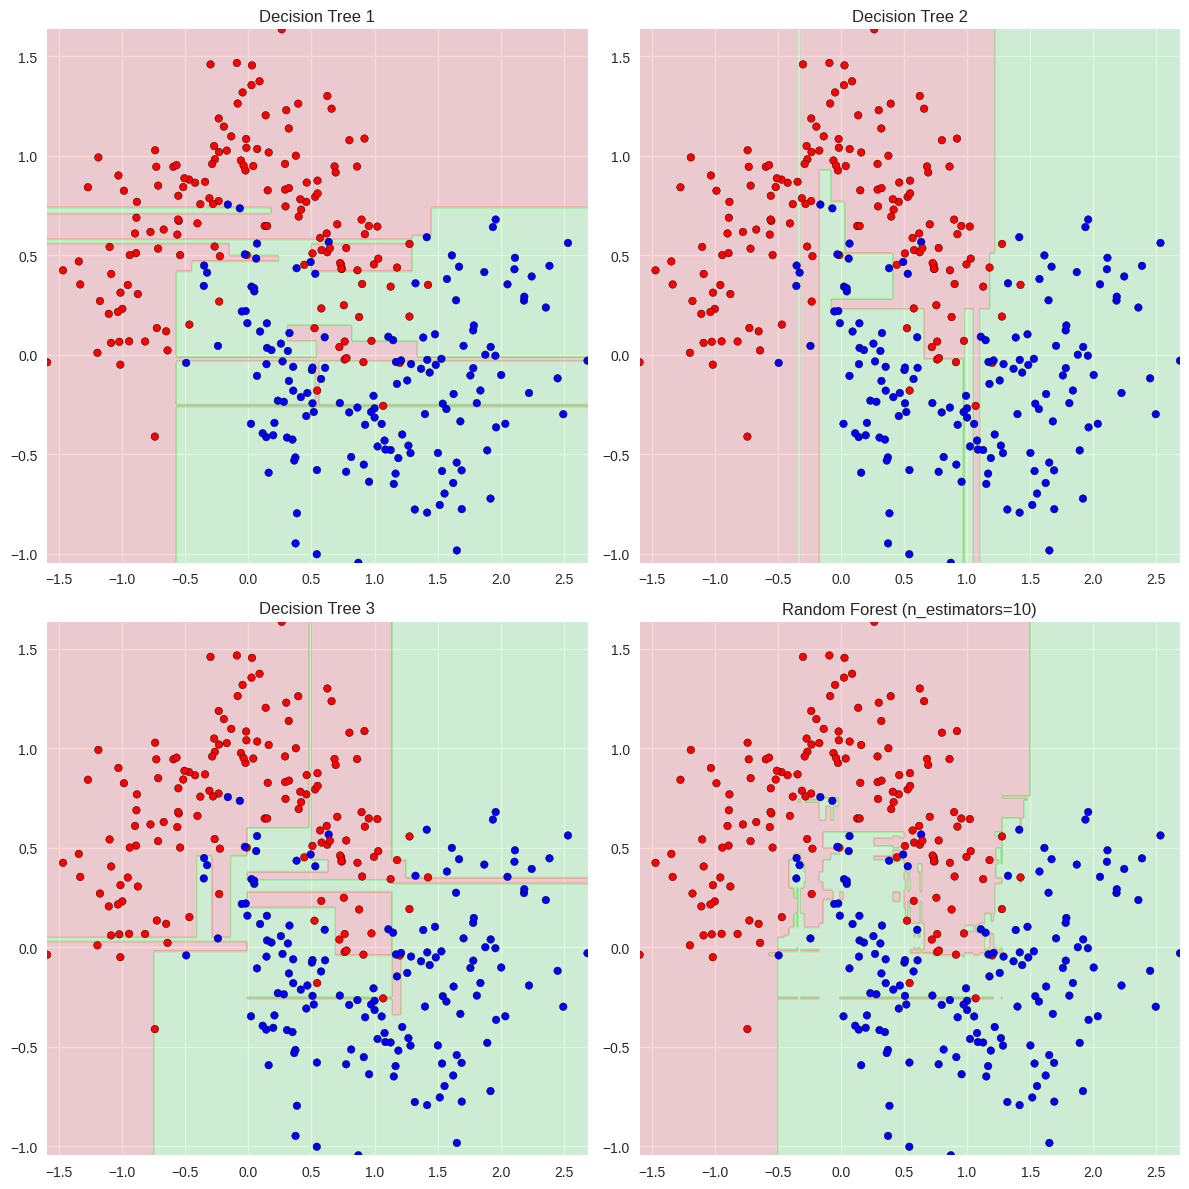

In [ ]:
# 提供 Python code: 使用moons dataset 和 Random forest，n_estimators=10，呈現前3個estimator和整體random forest的decision boundaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

# Create the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

# Create the RandomForestClassifier with n_estimators=10
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
forest_clf.fit(X, y)

# Function to plot the decision boundary
def plot_decision_boundary(clf, X, y, title, ax):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Updated colors for better contrast
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(('lightcoral', 'lightgreen')))
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
    ax.set_title(title)
    ax.set_xlim(X[:, 0].min(), X[:, 0].max())
    ax.set_ylim(X[:, 1].min(), X[:, 1].max())

# Plot the decision boundaries of the first three trees and the full RandomForest in a 2x2 layout
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Plot the first three individual decision trees' boundaries
for i in range(3):
    row, col = divmod(i, 2)
    tree_clf = forest_clf.estimators_[i]
    plot_decision_boundary(tree_clf, X, y, title=f"Decision Tree {i+1}", ax=axes[row, col])

# Plot Random Forest's boundary in the last subplot
plot_decision_boundary(forest_clf, X, y, title="Random Forest (n_estimators=10)", ax=axes[1, 1])

plt.tight_layout()
plt.show()


Decision Tree Accuracy: 0.9415
Random Forest Accuracy: 0.9708


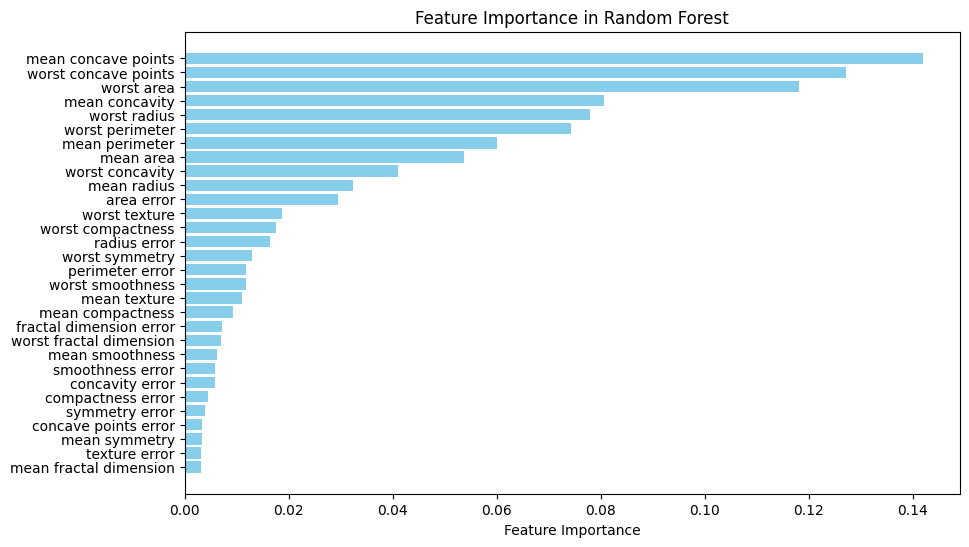

In [ ]:
# 產生Python code，比較決策樹和隨機森林的效能，同時使用隨機森林顯示特徵重要性
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset (Breast Cancer dataset as an example)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train a Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict and evaluate the Decision Tree
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")

# Initialize and train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 使用所有可用的 CPU 核心來平行運算

rf.fit(X_train, y_train)

# Predict and evaluate the Random Forest
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

# Show feature importance from Random Forest
feature_importances = rf.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importances[sorted_idx], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()
plt.show()
